# Day 2 Afternoon Session 1

Today we'll be reviewing a little bit and going over some of the advanced libraries in python. The main topics will be the linear algebra library `numpy`, the data organization library `pandas` and the plotting library `matplotlib`

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

## Numpy

Numpy is not part of the "standard library", but it might as well be for engineers. Numpy is Python's answer to Matlab - the "back end" is implemented in C so its performance is very fast (comparable to Matlab).

In [1]:
import numpy as np

## Creating numpy arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as arange, linspace, etc.
* reading data from files


In [3]:
v = np.array([1, 2, 3, 4], dtype = 'float64') #specified type can be important for underlying C code
print(v)
#appears to be a list
print(type(v)) #but actually a list

m = np.array([[1, 2], 
              [3, 4]]) #2D array
print(m)

[1. 2. 3. 4.]
<class 'numpy.ndarray'>
[[1 2]
 [3 4]]


## Math With Numpy Arrays

In [4]:
#math, including addition, multiplication, etc. is done element-wise -- not matrix multiplication!

s = np.array([1, 2, 3, 4])
print(s + 1)
print(s ** 2)

j = np.array([1, 2, 2, 1])
print(s - j)

print(s * j)

[2 3 4 5]
[ 1  4  9 16]
[0 0 1 3]
[1 4 6 4]


It is often more efficient to generate large arrays instead of creating them from lists. There are a few useful functions for this in numpy:

* `np.arange` - create a range with a specified step size (endpoints not included)
* `np.linspace` - create a range with a specified number of points (endpoints *are* included)
* `np.logspace` - create a range with a specified number of points in log space (endpoints *are* included)
* `np.mgrid` - create points on a multi-dimensional grid (similar to meshgrid in matlab)
* `np.random.rand` - create random number matrix from a uniform distribution
* `np.random.randn` - create random number matrix from a standard normal distribution
* `np.zeros` - create a matrix of zeros
* `np.ones` - create a matrix of ones
* `np.eye` - create identity matrix

be sure to check the [manual](https://docs.scipy.org/doc/numpy/reference/) if you get confused

In [7]:
l = np.arange(1, 4, 0.1) #like range, but creates a array instead of a generic iterable
print(l)
print(type(l))

#k = 

#j = np.random.rand gives numbers between 0 and 1


[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[[0.99284519 0.56608212 0.5278836 ]
  [0.75946063 0.33216859 0.42140562]
  [0.93132499 0.2018623  0.90878052]]

 [[0.59428743 0.93264358 0.05782538]
  [0.99328082 0.79718593 0.56267279]
  [0.42159071 0.23811037 0.0142641 ]]

 [[0.47015706 0.33538444 0.9933358 ]
  [0.20677253 0.14043875 0.46389651]
  [0.8348114  0.52709381 0.2992255 ]]]


## index slicing

In [8]:
j[1,1]
#is equivalent to
j[1][1]
#moves outside to in

0.5270938129597071
0.5270938129597071


## Matrix Operations

In [5]:
a = np.array([1,2])
b = np.array([[3, 4],
              [5, 6]])
np.matmul(a,b) #this is matrix multiplication!!!

j= np.array([1, 0, 0])
k = np.array([0, 2, 0])
np.cross(j, k) #cross product

array([0, 0, 2])

# Reshaping Arrays

In [8]:
print(b.reshape(4, 1))
print(b) #does not change b itself
b.reshape(1,4)
print(b)


[[3]
 [4]
 [5]
 [6]]
[[3 4]
 [5 6]]
[[3 4]
 [5 6]]


## Activity

Make two arrays (x and y.) The first is a linear spacing of 40 numbers between 0 and 10. The second, y, evaluates the equation below. Then add normally distributed noise to it that has a mean of 1 and a standard deviation of 0.5 We'll use this for plotting in the next section.

$y = 0.04x^3 - 0.5x^2 + 2.5x$

In [13]:
x = np.linspace(0, 10, 40)
print(x)

y = 0.04 * x ** 3 - 0.5 * x ** 2 + 2.5 * x 
noise = np.random.randn(len(x)) * 0.5 + 1 #randn gives mean 0, std 1, so we multply by 0.5 and add 1
y += noise
print(y)

[ 0.          0.25641026  0.51282051  0.76923077  1.02564103  1.28205128
  1.53846154  1.79487179  2.05128205  2.30769231  2.56410256  2.82051282
  3.07692308  3.33333333  3.58974359  3.84615385  4.1025641   4.35897436
  4.61538462  4.87179487  5.12820513  5.38461538  5.64102564  5.8974359
  6.15384615  6.41025641  6.66666667  6.92307692  7.17948718  7.43589744
  7.69230769  7.94871795  8.20512821  8.46153846  8.71794872  8.97435897
  9.23076923  9.48717949  9.74358974 10.        ]
[ 1.38631091  1.5451118   2.04144472  1.97553907  2.69049613  3.90357087
  4.07762787  4.74027401  4.5783666   4.58505264  4.55916964  4.60030339
  5.53260666  5.03736499  5.9009616   5.93873417  5.47676351  5.5258999
  5.99154291  5.3751085   6.40332748  6.1752197   6.54625523  6.8919884
  6.80278872  6.5760608   8.44203546  7.90657447  8.72566285  8.62585409
  8.33340901  9.07698122  9.73420359 11.34223014 11.03876442 11.52597432
 13.14306676 13.61693141 14.23286158 16.05200553]


# matplotlib - Plotting in Python

Matplotlib has advantages:

* Easy to get started (MATLAB-like interface)
* Support for LaTeX formatted labels and texts
* Output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* Extensive gallery of examples with source code (https://matplotlib.org/gallery.html)
* Programmatic control over all aspects of figures


Other plotting tools are available (Plotly, Bokeh, D3, ...) but `matplotlib` is the workhorse.

Matplotlib can be used in two ways:

* `pylab` modules (works like MATLAB)
* object-oreinted interface (harder but more powerful)

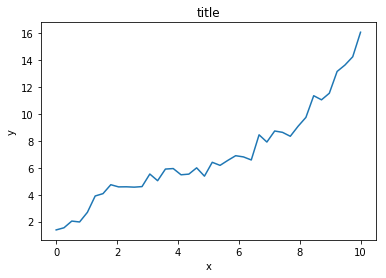

In [16]:
#object oriented is pyplot
#this first example is pylab
from pylab import * #makes it functionally equivalent to matlab

figure()
plot(x,y)
xlabel('x')
ylabel('y')
title('title')
#LaTeX syntax works in all strings for pylab
show()

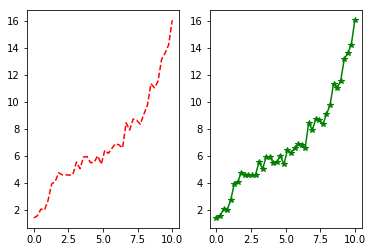

In [19]:
#can also do suplots
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(x, y, 'g*-')

## The matplotlib object-oriented interface

The `pylab` interface is easy, but limited.

* Use simple global functions that match with MATLAB
* Objects are implicitly defined and hidden from users.

The `pyplot` object-oriented interface is harder to learn, but much more powerful.

* Use objects instead of global functions.
* Explicitly define objects - much better for multiple figures.

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Text(0.5,0,'x')

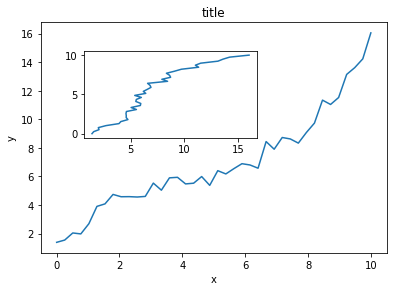

In [25]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#the matrix above says start at 10% over and 10% up into the figure, then continue for 80% of the figure (both directions)
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) #sets position - see output

axes1.plot(x, y)
axes2.plot(y, x)
axes1.set_title('title')
axes1.set_ylabel('y')
axes1.set_xlabel('x')

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class. You can output in many formats, but the most common are:

* PNG (raster)
* JPG (raster)
* SVG (vector)
* PDF (vector)

The SVG and PDF formats are great because they can be edited afterward with vector graphics programs like Inkscape or Adobe Illustrator.

In [26]:
fig.savefig('picture.pdf')
#it knows which type to save it as based on the extension you put
#it puts the figure in the same folder as you're currenly in 

## The Gallery

Matplotlib is a complicated library. The matplotlib gallery is the most useful resource for learning matplotlib

https://matplotlib.org/gallery.html

Just use this library to look for what you want, then try to reverse engineer everything.

## Activitiy

make a barchart with the following data with red bars. Then put the word "Success!" above the data at a 30 degree angle. (hint: Use the matplotlib gallery to get on the right track)

Text(0.9,72.8226,'Success!')

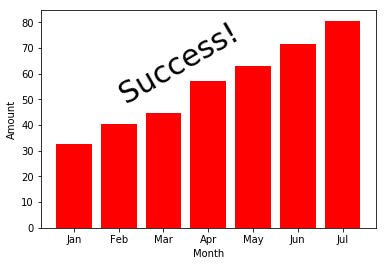

In [44]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul']
amount = np.linspace(30,80,7) + np.random.randn(7) * 3

fig, ax = plt.subplots()
xpos = np.arange(len(month))

ax.bar(xpos, amount, color='red')
ax.set_xticks(xpos)
ax.set_xticklabels(month)
ax.set_xlabel("Month")
ax.set_yticks(range(0,90,10))
ax.set_ylabel("Amount")

from __future__ import unicode_literals


ax.text(0.9, amount[4] + 10, 'Success!', rotation=30, fontsize=30)

# Scipy

Scipy is a library focused on tools that scientists will often need, such as optimization, statistics, and numerical integration.

If you combine numpy, matplotlib, and scipy, you basically have matlab, just in python

## Linear Regression

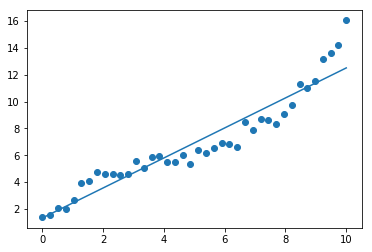

In [46]:
#look up scipy linear regression
from scipy.stats import linregress

m, b, r, p, stderr = linregress(x,y) #gives slope, intercept, stat values for a linear regression of x and y

plt.scatter(x,y) #makes the scatter plot of the data
plt.plot(x, x * m + b) #using the regression we've been given to plot a line
plt.show()

## Polynomial Fitting

numpy actually has tools for this `np.polyfit`

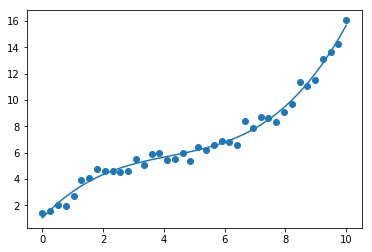

In [48]:
#pull up numpy polyfit documentation
#poly1d takes the regression and creates a function
coeffs = np.polyfit(x,y,3) #3rd degree poly from x, y
p = np.poly1d(coeffs) #creates a function p(x)

plt.scatter(x, y)
plt.plot(x, p(x))
plt.show()


But how would you know that a 3rd degree polynomial is best?

## Model Selection With The Bayesian Information Criterion

Bayesian information criterion (BIC) attempts to balance the complexity of a model with its goodness of fit, it is defined to be:

$ BIC = n*\ln{(\sigma^2_e)} + k*\ln(n)$

where $n$ is the number of data points, $\sigma_e$ is the standard deviation of the error, and $k$ is the number of parameters.

(Lower BIC is better)

In [20]:
#here's a function that implements it
#don't worry too much about the specific information
#works for model selection - choose one with lowest BIC
def BIC(y, yhat, k, weight = 1):
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + weight*k*np.log(n)
    return B

h = BIC(y,p(x),3)
print(h)

-62.14400605131506


Let's loop through the different polynomial orders and and plot the BIC

Text(0.5,0,'polynomial order')

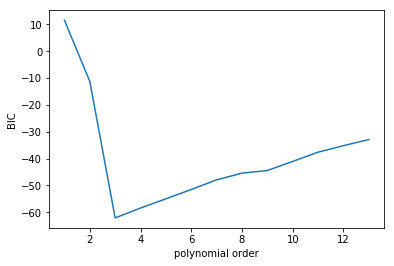

In [21]:
err = []
poly_range = range(1,14)
for i in poly_range:
    #making a list of all the BIC of each degree polynomial to find minimum
    coefficients = np.polyfit(x, y, i)
    p = np.poly1d(coefficients)
    err.append(BIC(y,p(x),i))


plt.plot(range(1,14),err)
plt.ylabel('BIC')
plt.xlabel('polynomial order')
plt.show()
#so it turns out that the minimum is 3rd degree, which is why we used that

## Arbitrary Functional Forms



[1.0999569  1.28968977]


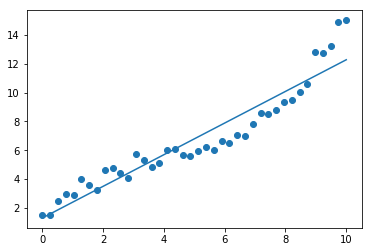

In [22]:

from scipy.optimize import curve_fit

def line(x,m,b):
    return m*x+b

params, params_covariance = curve_fit(line,x,y)
#we're just using it for linear for now, but you can use it for any curve function - just put it in as a parameter
#minimizes error


print(params)
plt.figure()
plt.scatter(x,y)
plt.plot(np.linspace(x[0],x[-1],100),
         line(np.linspace(x[0],x[-1],100),*params))  #note passing in aruguments with *

## Optimization

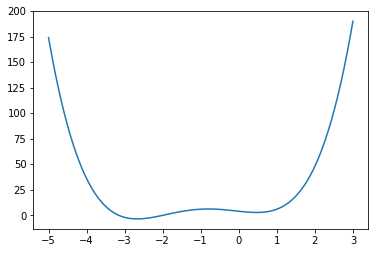

In [23]:
from scipy import optimize
#local minima finding tool - it'll find the one closest to your initial guess

def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
y = f(x)
ax.plot(x, y);

In [24]:
from scipy import optimize

x_min = optimize.minimize(f,  -1) #(function, initial guess)
print(x_min.x)

[-2.67298167]
